In [164]:
import numpy as np
%run Karate_data_import.ipynb
import sys
sys.path.append('../') # Change path
from Functions import * # Import Gradient_function

In [157]:
## distance in Gradient_function and Loss_function is changes to np.linalg.norm(point_1 - point_2)
def Gradient_function(point_number,index,Y,point):
    alpha = 5 # Define Alpha
    gradient = 0 # Define gradient for the Gradient_function
    for m in range(len(Y)): # Run over all "edges"
        if ((Y[m][1] == point_number) or (Y[m][2] == point_number)): # Check to see if point_number is part of the edge
            connection = Y[m][0] # Check to see if there is a connection
            distance = np.linalg.norm(point[Y[m][1]] - point[Y[m][2]]) # Calculate the euclidean distance
            point_index_diff = (point[point_number][index] - point[Y[m][1]][index]) + (point[point_number][index] - point[Y[m][2]][index]) # Calculate point_a,i-point_b,i
            numerator = -2 * connection * point_index_diff * np.exp(-connection * (alpha - distance)) # Calculate the numerator
            denominator = 1 + np.exp(-connection * (alpha - distance)) # Calculate the denominator
            gradient += numerator / denominator # Calculate the fraction and plus all connection there is with point_number together
    return gradient 

def Loss_function(point,Y):
    alpha = 5 # Define Alpha
    result = 0 # Define result for the Loss_function

    for m in range(len(Y)): # Run over all "edges"
        connection = Y[m][0] # Check to see if there is a connection
        point_1 = point[Y[m][1]] # Define coordinates for vertex 1
        point_2 = point[Y[m][2]] # Define coordinates for vertex 2
        distance = np.linalg.norm(point_1 - point_2) # Calculate the euclidean distance
        sigmoid_value = 1 / (1 + np.exp(-connection * (alpha - distance))) # Calculate the sigmoid function
        result += np.log(sigmoid_value) # Sum all the probabilities 
    return result

In [176]:
mu = np.zeros(2) # Define mean (mu) as a zero vector
cov_matrix = np.array([[1.0, 0], [0, 1.0]]) # Define covariance matrix
num_samples = 34  # Number of samples you want to generate

points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}

In [217]:
# Stopping after n iterations
n = 1 # Number of iterations
MLL = np.zeros(n) # Define the MLL
grad_sum = np.zeros(n) # Define the gradient sum
avg_step = np.zeros(n)

for k in range(n):
    p = np.zeros((num_samples+1,2))
    for i in range(1,num_samples+1): # Run over number of num_samples
        for j in range(2): # Run over dimension
            grad_sum[k] += Gradient_function(i,j,Y,points)**2
            p[i][j] += 0.1*Gradient_function(i,j,Y,points)
            avg_step[k] = np.sum((p**2))/p.size
            points[i][j] += 0.1*Gradient_function(i,j,Y,points) # Use Gradient_function and take step=0.1*grad
            
    MLL[k] = Loss_function(points,Y) # Calcualte the probability using Loss_function

In [220]:
points

{1: array([-7,  6]),
 2: array([-0.53935763, -2.55534827]),
 3: array([ 0.21818951, -0.6750691 ]),
 4: array([-0.68005667, -2.06761856]),
 5: array([1.49678653, 1.78206029]),
 6: array([1.5198591 , 1.88235033]),
 7: array([1.03463193, 2.796428  ]),
 8: array([-1.75382908, -1.47467007]),
 9: array([-1.00948457, -0.49181771]),
 10: array([ 0.27910887, -0.58411057]),
 11: array([1.08952699, 2.03740918]),
 12: array([0.11788162, 2.3715682 ]),
 13: array([ 0.57798619, -3.07833485]),
 14: array([-2.09441279, -1.93960987]),
 15: array([0.22486511, 0.25490623]),
 16: array([-3.37436491,  0.67038907]),
 17: array([3.39904803, 1.91834315]),
 18: array([ 0.32560451, -2.67174877]),
 19: array([-2.8065229 ,  1.00009088]),
 20: array([-0.86661194, -3.23043295]),
 21: array([-3.79899524, -3.03095868]),
 22: array([ 0.78516257, -2.26935719]),
 23: array([-2.45930069,  1.19097479]),
 24: array([-4.00767188, -1.19638019]),
 25: array([-4.0221199 , -1.51039313]),
 26: array([-4.35401821, -0.96881686]),
 

In [172]:
grad_sum

array([16504.55795685])

In [173]:
avg_step

array([2.35779399])

In [124]:
dist = np.zeros(len(Y))
for m in range(len(Y)):
    if ((Y[m][1] == i) or (Y[m][2] == i)): 
        dist[m] = (np.linalg.norm(points[Y[m][1]] - points[Y[m][2]]))**2

In [113]:
np.linalg.norm(points[34] - points[33])**2

204.99402725087162

In [125]:
dist

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., nan,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [102]:
max(dist)

256.3818885486852

In [53]:
# Stopping after n iterations
n = 1 # Number of iterations
MLL = np.zeros(n) # Define the MLL
grad_sum = np.zeros(n) # Define the gradient sum
for k in range(n):
    for i in range(1,num_samples+1): # Run over number of num_samples
        for j in range(2): # Run over dimension
            alpha = 5 # Define Alpha
            gradient = 0 # Define gradient for the Gradient_function
            for m in range(len(Y)): # Run over all "edges"
                if ((Y[m][1] == i) or (Y[m][2] == i)): # Check to see if point_number is part of the edge
                    connection = Y[m][0] # Check to see if there is a connection
                    distance = (np.linalg.norm(points[Y[m][1]] - points[Y[m][2]]))**2 # Calculate the euclidean distance squared
                    point_index_diff = (points[i][j] - points[Y[m][1]][j]) + (points[i][j] - points[Y[m][2]][j]) # Calculate point_a,i-point_b,i
                    numerator = -2 * connection * point_index_diff * np.exp(-connection * (alpha - distance)) # Calculate the numerator
                    print(distance)

            #grad_sum[k] += Gradient_function(i,j,Y,points)**2
            #points[i][j] += 0.1*Gradient_function(i,j,Y,points) # Use Gradient_function and take step=0.1*grad
            
    #MLL[k] = Loss_function(points,Y) # Calcualte the probability using Loss_function

23.94785382476084
16.815300642923432
21.946836851463146
41.178181522956926
50.110810176425716
50.82542685184141
15.737545030320458
8.310522879343212
2.4563194369064614
36.82405491946315
69.02135510833509
27.94874666068103
18.232708606150723
13.915952141209006
3.2903451064663702
83.16803458938463
44.23344102438563
8.951235024611783
28.682095637735376
1.4263418930138005
7.877796070199827
9.367884880538766
7.9342103287955394
55.45217265093282
41.65618930660903
17.458662337054562
10.401805844693804
25.728890272462746
10.009436827083132
11.022820166446637
8.136677143707747
54.61928793740866
732.5741624627119
23.94785382476084
16.815300642923432
21.946836851463146
41.178181522956926
50.110810176425716
50.82542685184141
15.737545030320458
8.310522879343212
2.4563194369064614
36.82405491946315
69.02135510833509
27.94874666068103
18.232708606150723
13.915952141209006
3.2903451064663702
83.16803458938463
44.23344102438563
8.951235024611783
28.682095637735376
1.4263418930138005
7.877796070199827


/var/folders/w4/drmx799s2w14d7q5v4w2_y_r0000gn/T/ipykernel_1379/3117687311.py:15: RuntimeWarning: overflow encountered in scalar multiply
  numerator = -2 * connection * point_index_diff * np.exp(-connection * (alpha - distance)) # Calculate the numerator


In [54]:
np.exp(720.1685742100558)

/Users/signeolsen/opt/anaconda3/envs/bachelor/lib/python3.9/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


inf

In [ ]:
def Gradient_function(point_number,index,Y,point):
    alpha = 5 # Define Alpha
    gradient = 0 # Define gradient for the Gradient_function
    for m in range(len(Y)): # Run over all "edges"
        if ((Y[m][1] == point_number) or (Y[m][2] == point_number)): # Check to see if point_number is part of the edge
            connection = Y[m][0] # Check to see if there is a connection
            distance = (np.linalg.norm(point[Y[m][1]] - point[Y[m][2]]))**2 # Calculate the euclidean distance squared
            point_index_diff = (point[point_number][index] - point[Y[m][1]][index]) + (point[point_number][index] - point[Y[m][2]][index]) # Calculate point_a,i-point_b,i
            numerator = -2 * connection * point_index_diff * np.exp(-connection * (alpha - distance)) # Calculate the numerator
            denominator = 1 + np.exp(-connection * (alpha - distance)) # Calculate the denominator
            gradient += numerator / denominator # Calculate the fraction and plus all connection there is with point_number together

    return gradient 

In [6]:
# Adding stopping criteria
prev_grad = 200 
grad = 0
k = 0
n = 100
MLL = np.zeros(n) # Define the MLL
grad_sum = np.zeros(n) # Define the gradient sum

while abs(prev_grad - grad) > 0.1: # stopping criteria
    prev_grad = grad
    for i in range(1,num_samples+1): # Run over number of num_samples
        for j in range(2): # Run over dimension
            grad_sum[k] += Gradient_function(i,j,Y,points)**2
            points[i][j] += 0.1*Gradient_function(i,j,Y,points) # Use Gradient_function and take step=0.1*grad
    grad = grad_sum[k]
    MLL[k] = Loss_function(points,Y) # Calcualte the probability using Loss_function
    print(k)
    k += 1

0


In [9]:
MLL

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

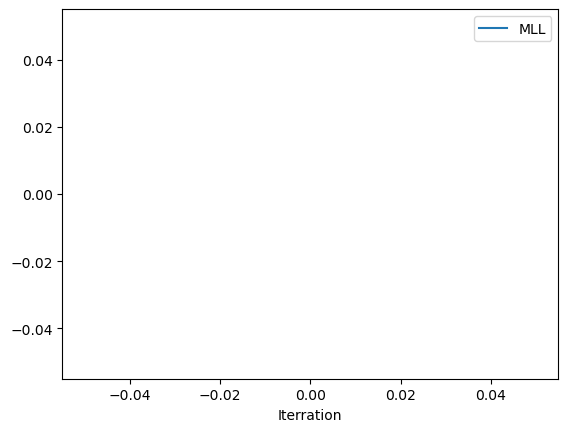

In [8]:
plt.plot(MLL,label='MLL')
#plt.plot(grad_sum1[0:k], label='Gradient sum')
#plt.ylabel('MLL')
plt.xlabel('Iterration')
plt.legend()
plt.show()

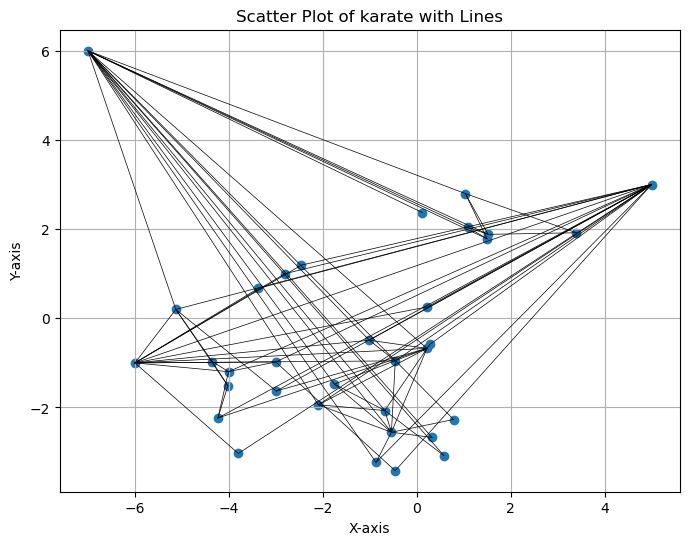

In [219]:
plt.figure(figsize=(8, 6))

for m in range(len(Y)): 
    if Y[m][0] == 1: # Check if there is a connection between Y[m][1] and Y[m][2]
        point1 = points[Y[m][1]]
        point2 = points[Y[m][2]]
        plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color='black', linewidth=0.5) # Ad a line between Y[m][1] and Y[m][2]

# extract the points and plot them
x = [point[0] for point in points.values()]
y = [point[1] for point in points.values()]
plt.scatter(x, y)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of karate with Lines')
plt.grid(True)
plt.show()